## Project Group 34
- Helin Wang 73965865
- Qingfeng Shen  52757085
- Matthew Gillies 59188508
- Hanyu Dai 47608518

In [1]:
options(warn = -1)
library(broom, warn.conflicts = FALSE)
library(latex2exp, warn.conflicts = FALSE)
library(tidyverse, warn.conflicts = FALSE)
library(repr, warn.conflicts = FALSE)
library(digest, warn.conflicts = FALSE)
library(gridExtra ,warn.conflicts = FALSE)
library(faraway, warn.conflicts = FALSE)
library(mltools, warn.conflicts = FALSE)
library(leaps, warn.conflicts = FALSE)
library(glmnet, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(GGally, warn.conflicts = FALSE)
library(AER, warn.conflicts = FALSE)
library(caret, warn.conflicts = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package

# Predicting Used Vehicle Listing Price 

# Introduction:

**Background**

The demand for pre-owned cars has been growing over the years, overtaking the new cars market in some regions of the world including the United States [1]. Many consumers choose used cars due to affordability and economic conditions. Therefore the sales price of a used car is an important aspect in a transaction.

However, used car transactions involve complex decision making from both the sellers and buyers. The sales price of a used car can be more difficult to predict than a new car. The price is influenced not only by the car’s basic features, such as brand, horse power, etc., but also by the condition of the car such as mileage, age, and paintwork [2]. According to data, variation in used car prices is approximately five times as large as the variation of new-car prices [1].

**Objective**

Being able to predict the price of a car based on its attributes can provide insights to both buyers and sellers, helping them make more informed decisions. The objective of this study is to predict used car prices and analyze which variables are significant factors in predicting the price of a used car.

The goal of this project is to build and select a predictive model for the price of a used car with the available input variables using Linear Regression.

**Dataset**

For this project, we are using the dataset originally published on Kaggle in 2016 [2]. 

This dataset contains information about roughly 370,000 used car listings from the e-commerce website Ebay. The twenty columns in the given dataset are as follows:
datecrawled, name, seller, offertype, price, abtest, vehicletype, yearofregistration, gearbox, powerps, model, kilometer, monthofregistration, fueltype, brand, notrepaireddamage, datecreated, nrofpictures, postalcode, lastseen

# Method:

Above all, we clean the data and remove the columns that are irrelevant to the prediction. To better understand the numerical and categorical variables in the data, we visualize them by using histograms and bar plots respectively. The histograms show that the distribution of “monthOfRegistration” is approximately normal, “Age” appears to be right-skewed and “kilometers” is left-skewed. The bar plots show the data contains more manual-driven cars with no non-repaired damage. What’s more, to evaluate the correlations between numerical variables, we use a correlation heat map. From that, we find all numerical variables have low correlation. The highest correlation coefficient (0.39) is the correlation between “Age” and “kilometers”. This may lead to strong correlations between categorical variables or weak correlations within numerical variables.
    We use forward selection to find the best LR model to predict used-car prices. Since the model will violate the assumption of normally distributed residuals, we have to simplify the dataset. So we filter the vehicle type to be “cabrio” (two-door convertibles) and remove non-binary categorical variables. 
Then we split the data into a training set (70%) and a testing set (30%). After that, we use regsubset() to perform the forward selection. We choose the model with the lowest Cp. By looking at the result, we find that the model with 6 input variables gives the lowest Cp (7), which means it will give the most accurate prediction. Then we fit a linear model using the covariates: gearbox, powerPS, kilometer, monthOfRegistration, notRepairedDamage, and Age. However, we find the model gives 175 negative predicted prices, so we take the log of the predicted prices to produce positive predictions. 
To examine heteroscedasticity, we create residual plots. The residuals are randomly distributed, while the plot shows a uniform and more scattered cloud of points. This implies the presence of homoscedasticity. Moreover, we create the Q-Q plot and histogram of residuals to evaluate the normality assumption. Since all the data points are on the 45° degree dotted line, it implies the residuals are likely Normal. The histogram of residuals is approximately normal, which is slightly right-skewed. This indicates the data contains outliers. 
    Finally, we predict the testing data with 95% confidence intervals and calculate mean squared prediction error (MSPE).  We find that each prediction has an average squared error of 0.268, but this is hard to interpret since we use log(price). So we produce the MSPE of the original price which is about $4967.62. Although this value is quite big, this is the best result we can obtain from our data. The biased result may be due to the skewed dataset and outliers. To improve the model, we should remove the outliers in the data, and standardize the numerical variables when necessary. 

## Preliminary Results


In [2]:
## Loading in dataset:

car_data <- read_csv("./autos.csv") %>% filter(price < 100000 & price > 1000) %>% filter(vehicleType == "cabrio") 
car_data[1:6,]

Rows: 367904 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): name, seller, offerType, abtest, vehicleType, gearbox, model, fue...
dbl   (6): price, yearOfRegistration, powerPS, kilometer, monthOfRegistratio...
dttm  (3): dateCrawled, dateCreated, lastSeen

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, cl

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>
2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39
2016-03-30 08:50:37,BMW_120i_Cabrio_mit_M_Paket,privat,Angebot,14800,control,cabrio,2008,manuell,170,1er,125000,4,benzin,bmw,NA,2016-03-30,0,48691,2016-04-07 00:17:23
2016-03-22 17:56:12,Smart_Cabrio_TV_bis_07/17,privat,Angebot,3000,control,cabrio,2006,automatik,61,fortwo,80000,1,benzin,smart,nein,2016-03-22,0,12055,2016-03-22 17:56:12
2016-03-07 22:36:54,BMW_325_i_Cabrio_wenig_Kilometer,privat,Angebot,14999,test,cabrio,2007,manuell,218,3er,50000,8,benzin,bmw,nein,2016-03-07,0,01129,2016-03-15 10:17:59
2016-03-26 15:47:58,Opel_Astra_Twin_Top_2.0_Turbo,privat,Angebot,8599,test,cabrio,2006,manuell,200,astra,125000,9,benzin,opel,nein,2016-03-26,0,79761,2016-04-06 04:15:35
2016-04-01 22:55:34,Audi_Cabriolet_Typ_89_2.0L,privat,Angebot,4800,test,cabrio,1996,manuell,116,80,150000,6,benzin,audi,nein,2016-04-01,0,38300,2016-04-05 23:46:14


We filter the price and the vehicle type in order for full functionality of the dataset. Without these filters the resulting linear model is extremely inaccurate due to the presence of outliers/incorrectly added data points. 

In [3]:
car_data_na <- car_data %>% filter_all(any_vars(is.na(.)))
head(car_data_na)                             

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>
2016-03-30 08:50:37,BMW_120i_Cabrio_mit_M_Paket,privat,Angebot,14800,control,cabrio,2008,manuell,170,1er,125000,4,benzin,bmw,NA,2016-03-30,0,48691,2016-04-07 00:17:23
2016-04-04 21:52:13,Megane_CC,privat,Angebot,3650,test,cabrio,2004,manuell,113,megane,150000,9,benzin,renault,NA,2016-04-04,0,21739,2016-04-07 00:45:06
2016-04-04 17:44:53,Volkswagen_Golf_4_Cabrio_2.0l_Benzin,privat,Angebot,2400,test,cabrio,2001,NA,115,golf,150000,8,benzin,volkswagen,nein,2016-04-04,0,47533,2016-04-06 19:18:03
2016-03-05 14:25:18,PEUGEOT_306_Cabriolet_1_6_Saint_Tropez,privat,Angebot,2500,control,cabrio,1999,manuell,88,3_reihe,150000,6,benzin,peugeot,NA,2016-03-05,0,65624,2016-04-06 22:15:56
2016-03-11 21:49:52,Corvette_Z06,privat,Angebot,49500,test,cabrio,2013,NA,0,NA,10000,6,benzin,sonstige_autos,nein,2016-03-11,0,79774,2016-03-13 04:45:42
2016-03-21 23:53:36,Golf_Cabrio,privat,Angebot,1480,test,cabrio,2000,manuell,74,golf,150000,6,benzin,volkswagen,NA,2016-03-21,0,19246,2016-04-05 14:17:54


It appears that most of the NA values are occurring in the notRepairedDamage column. As there is no way to determine if the cars actually do have repaired damage, we will remove these values from the dataset. 

## Data Cleaning and Preparation

In [4]:
## Removing NA's from dataset
car_data_clean <- car_data %>% na.omit()
sum(is.na(car_data_clean))
str(car_data_clean)

[1] 0

tibble [17,418 × 20] (S3: tbl_df/tbl/data.frame)
 $ dateCrawled        : POSIXct[1:17418], format: "2016-04-01 20:48:51" "2016-03-22 17:56:12" ...
 $ name               : chr [1:17418] "Peugeot_206_CC_110_Platinum" "Smart_Cabrio_T\xdcV_bis_07/17" "BMW_325_i_Cabrio_wenig_Kilometer" "Opel_Astra_Twin_Top_2.0_Turbo" ...
 $ seller             : chr [1:17418] "privat" "privat" "privat" "privat" ...
 $ offerType          : chr [1:17418] "Angebot" "Angebot" "Angebot" "Angebot" ...
 $ price              : num [1:17418] 2200 3000 14999 8599 4800 ...
 $ abtest             : chr [1:17418] "test" "control" "test" "test" ...
 $ vehicleType        : chr [1:17418] "cabrio" "cabrio" "cabrio" "cabrio" ...
 $ yearOfRegistration : num [1:17418] 2004 2006 2007 2006 1996 ...
 $ gearbox            : chr [1:17418] "manuell" "automatik" "manuell" "manuell" ...
 $ powerPS            : num [1:17418] 109 61 218 200 116 170 305 150 163 98 ...
 $ model              : chr [1:17418] "2_reihe" "fortwo" "3er" "astra" .

In [5]:
## Creating new column to represent age of the vehicle, since all ads are from 2016
car_data_clean$Year <- as.numeric(format(car_data_clean$dateCreated, "%Y"))
car_data_clean1 <- car_data_clean %>% mutate(Age = Year - yearOfRegistration) %>% select(-Year, -yearOfRegistration)
head(car_data_clean1)

ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. rep

dateCrawled,name,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Age
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>,<dbl>
2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,12
2016-03-22 17:56:12,Smart_Cabrio_TV_bis_07/17,privat,Angebot,3000,control,cabrio,automatik,61,fortwo,80000,1,benzin,smart,nein,2016-03-22,0,12055,2016-03-22 17:56:12,10
2016-03-07 22:36:54,BMW_325_i_Cabrio_wenig_Kilometer,privat,Angebot,14999,test,cabrio,manuell,218,3er,50000,8,benzin,bmw,nein,2016-03-07,0,01129,2016-03-15 10:17:59,9
2016-03-26 15:47:58,Opel_Astra_Twin_Top_2.0_Turbo,privat,Angebot,8599,test,cabrio,manuell,200,astra,125000,9,benzin,opel,nein,2016-03-26,0,79761,2016-04-06 04:15:35,10
2016-04-01 22:55:34,Audi_Cabriolet_Typ_89_2.0L,privat,Angebot,4800,test,cabrio,manuell,116,80,150000,6,benzin,audi,nein,2016-04-01,0,38300,2016-04-05 23:46:14,20
2016-04-03 18:58:25,BMW_Z4_roadster_2.2i_M_Paket__Klima__Xenon,privat,Angebot,9450,control,cabrio,manuell,170,z_reihe,150000,12,benzin,bmw,nein,2016-04-03,0,65549,2016-04-07 11:15:22,12


In [6]:
car_data_clean1 %>% count(nrOfPictures)
car_data_clean1 %>% count(abtest)

nrOfPictures,n
<dbl>,<int>
0,17418


abtest,n
<chr>,<int>
control,8373
test,9045


In [7]:
## Selecting desired columns:
## We will remove dateCrawled, name, postalCode, dateCreated and lastSeen as these columns are very specific and 
## will not be valuable to our prediction model. We will also remove nrOfPictures as the entire column is zeroes, 
## and abtest as this column is irrelevant in predicting the price. 
car_data_desired <- car_data_clean1 %>% select(-name, -postalCode, -nrOfPictures, -abtest, -dateCrawled,
                                               -dateCreated, -lastSeen)

In [8]:
nrow(car_data_clean1 %>% count(model))

[1] 79

In [9]:
## We will also remove the model column, as the extremely large amount of discrete values in this column will make it very hard
## to interpret the model when one-hot encoding is applied. This column is also represented in a more compact form through the 
## brand column. 

car_data_desired <- car_data_desired %>% select(-model)

In [10]:
car_data_clean1 %>% count(seller)
car_data_clean1 %>% count(offerType)

seller,n
<chr>,<int>
privat,17418


offerType,n
<chr>,<int>
Angebot,17418


In [11]:
## We will also filter the seller and offerType columns to contain only values that include private (privat) sellers and 
## offers (Angebot) to ensure our data is consistent throughout. These columns can be removed following the filtering as they 
## will have no effect on the prediction
car_data1 <- car_data_desired %>% filter(seller == "privat", offerType == "Angebot")
car_data_ready <- car_data1 %>% select(-seller, -offerType) %>% mutate(price = price + rnorm(10000, 100)) %>% 
    filter(powerPS < 200) %>% filter(Age > 0)
head(car_data_ready)

price,vehicleType,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
2299.427,cabrio,manuell,109,150000,8,benzin,peugeot,nein,12
3100.916,cabrio,automatik,61,80000,1,benzin,smart,nein,10
4899.425,cabrio,manuell,116,150000,6,benzin,audi,nein,20
9550.214,cabrio,manuell,170,150000,12,benzin,bmw,nein,12
9898.842,cabrio,manuell,150,60000,11,benzin,volkswagen,nein,10
6999.912,cabrio,manuell,163,100000,1,benzin,renault,nein,10


In [12]:
## Scaling kilometer column (divide by 10000)
#car_data_ready <- car_data_ready %>% mutate(kilometer = kilometer + rnorm(1000, 10))

In [13]:
#table(car_data_ready["price"])

In [14]:
# Inspecting summary of the data frame
summary(car_data_ready)

     price       vehicleType          gearbox             powerPS     
 Min.   : 1148   Length:13983       Length:13983       Min.   :  0.0  
 1st Qu.: 3501   Class :character   Class :character   1st Qu.:102.0  
 Median : 6094   Mode  :character   Mode  :character   Median :125.0  
 Mean   : 8043                                         Mean   :125.2  
 3rd Qu.:10351                                         3rd Qu.:160.0  
 Max.   :99599                                         Max.   :199.0  
   kilometer      monthOfRegistration   fuelType            brand          
 Min.   :  5000   Min.   : 0.000      Length:13983       Length:13983      
 1st Qu.: 80000   1st Qu.: 3.000      Class :character   Class :character  
 Median :125000   Median : 5.000      Mode  :character   Mode  :character  
 Mean   :112862   Mean   : 5.731                                           
 3rd Qu.:150000   3rd Qu.: 8.000                                           
 Max.   :150000   Max.   :12.000               

In [15]:
## Selecting only numeric columns:
car_data_num <- car_data_ready %>% select(price, Age, powerPS, kilometer, monthOfRegistration)

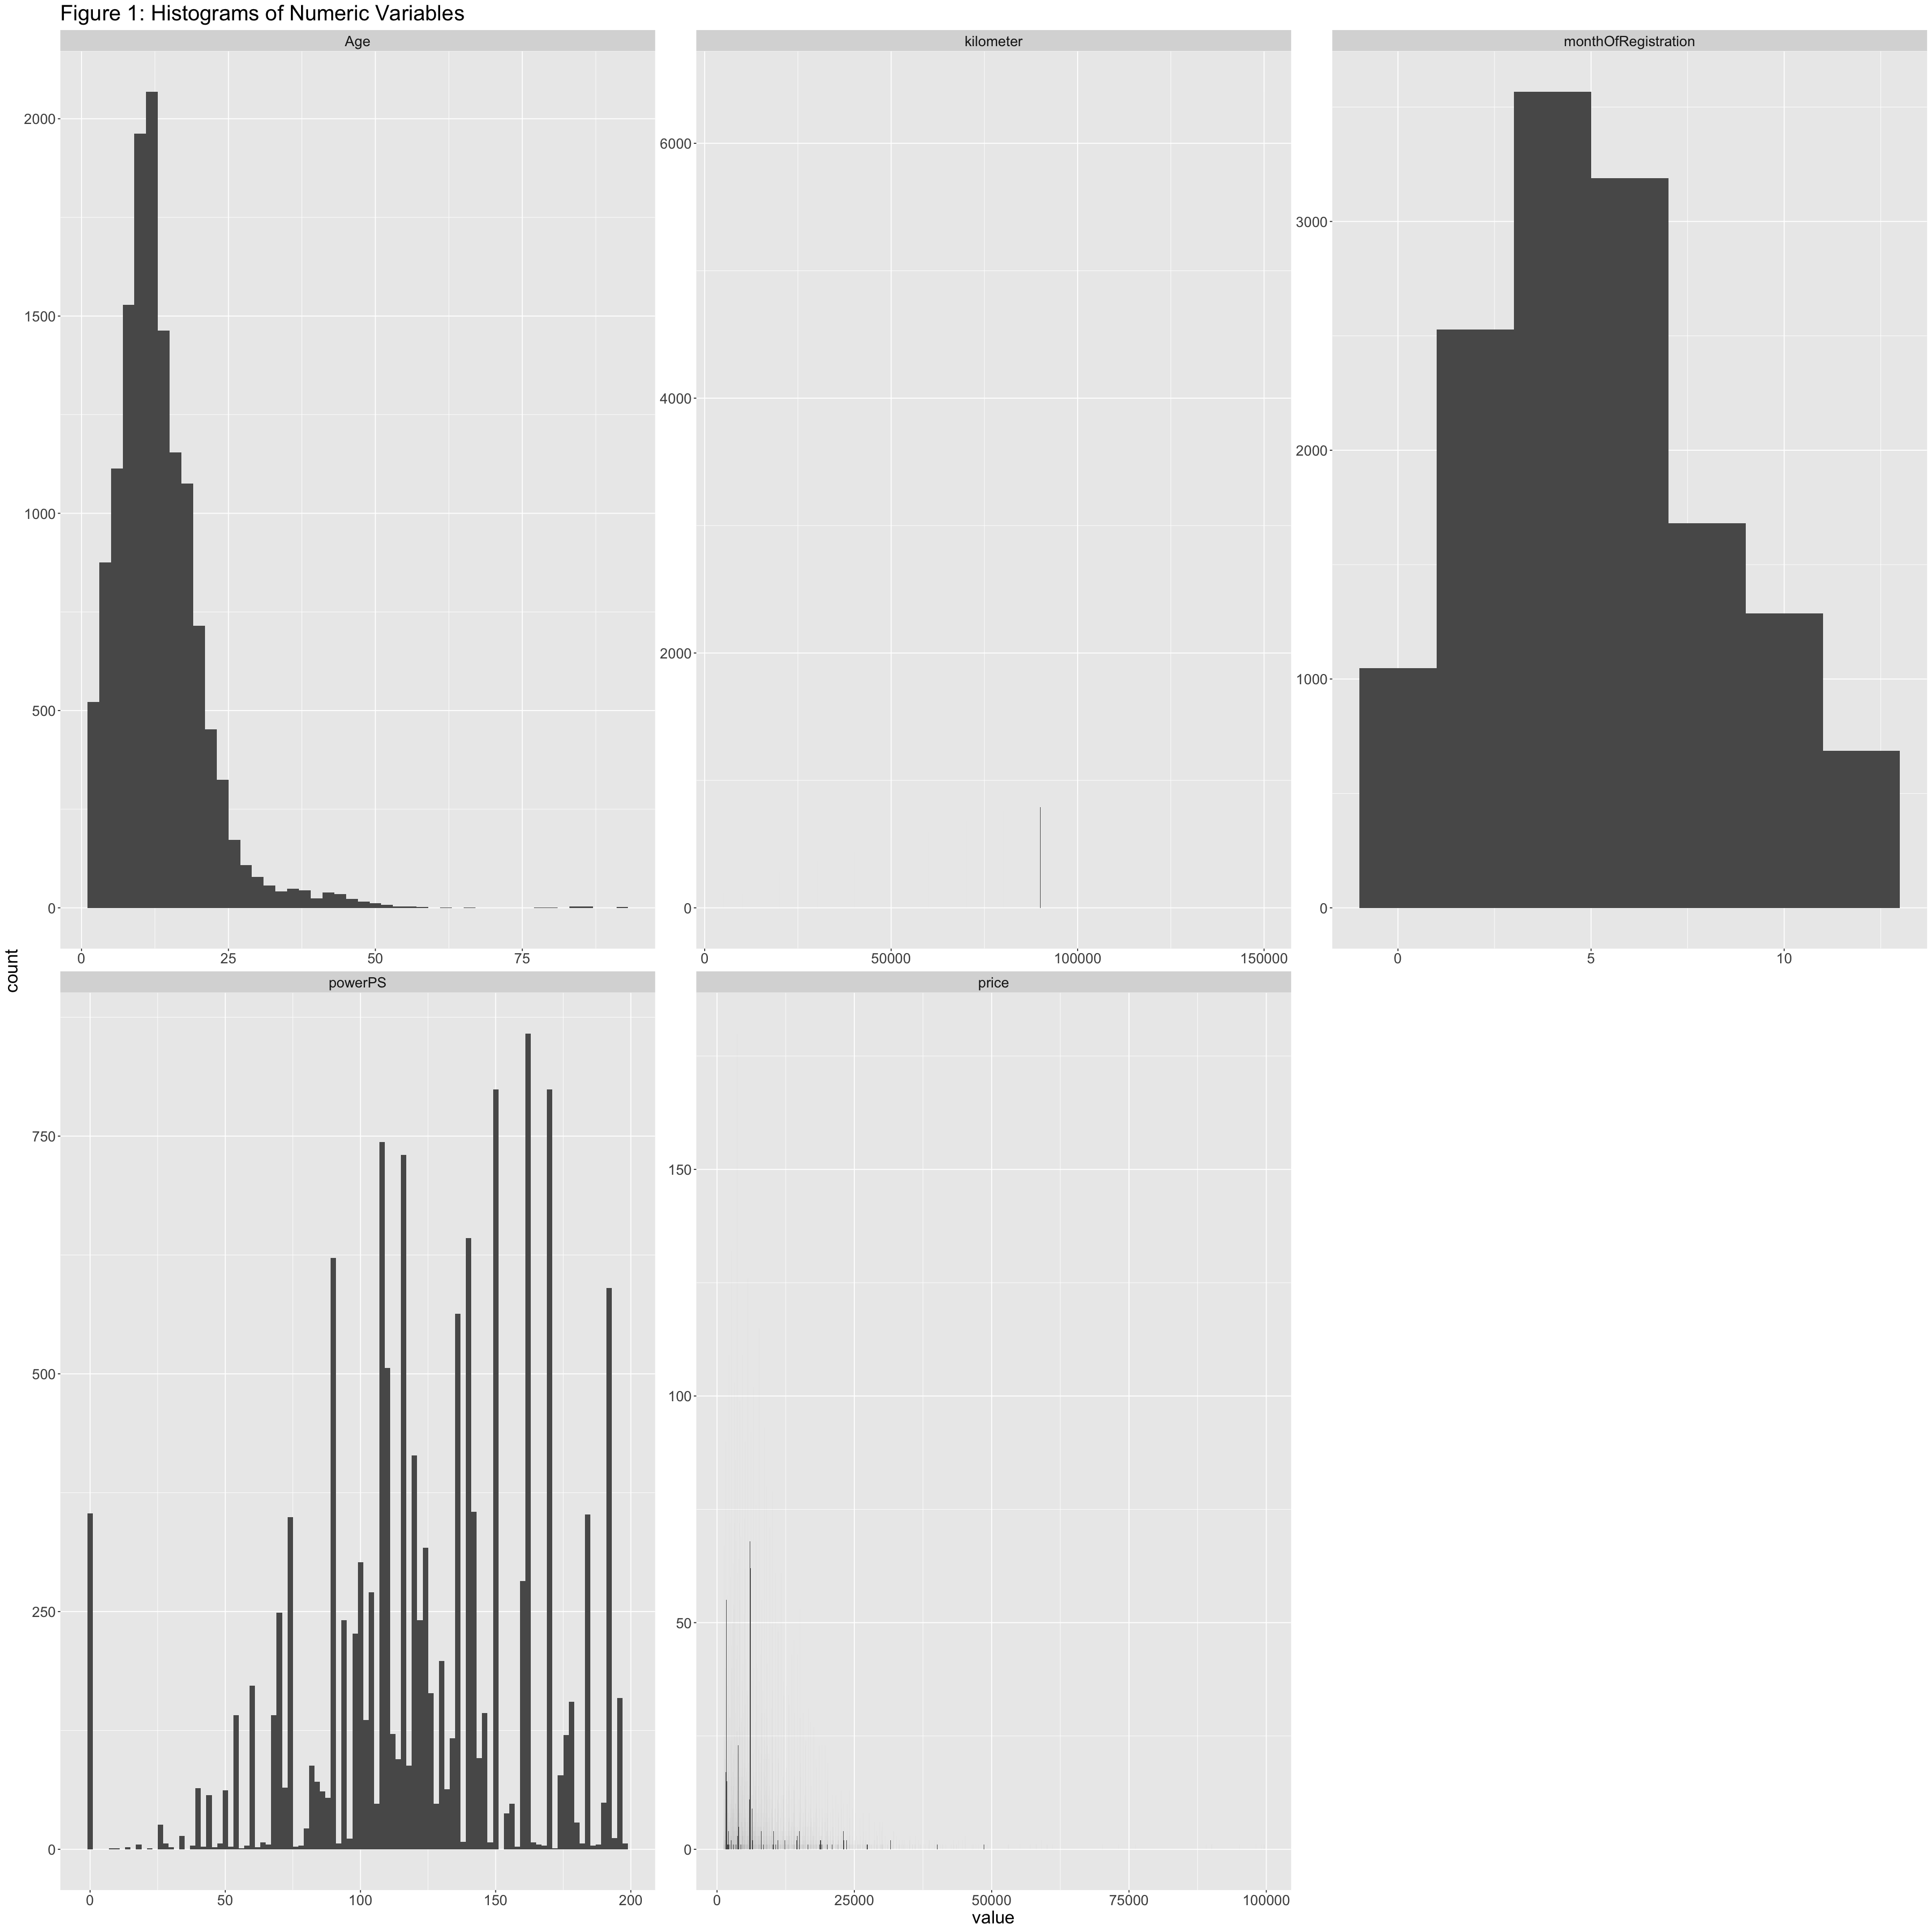

In [16]:
## Visualizing numeric columns with histograms
options(repr.plot.width = 30, repr.plot.height = 30)
car_data_long <- car_data_num %>%                          
  pivot_longer(colnames(car_data_num)) %>% 
  as.data.frame()

ggp1 <- ggplot(car_data_long, aes(x = value)) +    # Draw each column as histogram
  geom_histogram(binwidth = 2) + 
  facet_wrap(~ name, scales = "free") + 
  ggtitle("Figure 1: Histograms of Numeric Variables") +
  theme(text = element_text(size = 20))
ggp1

Histograms for kilometer and price are quite unreadable due to the presence of extreme values in the data. These outliers are necessary to the dataset however, as they represent extremely expensive and well-used vehicles. The distribution of monthOfRegistration is approximately uniform, while Age appears to be right-skewed and kilometers to be left-skewed. 

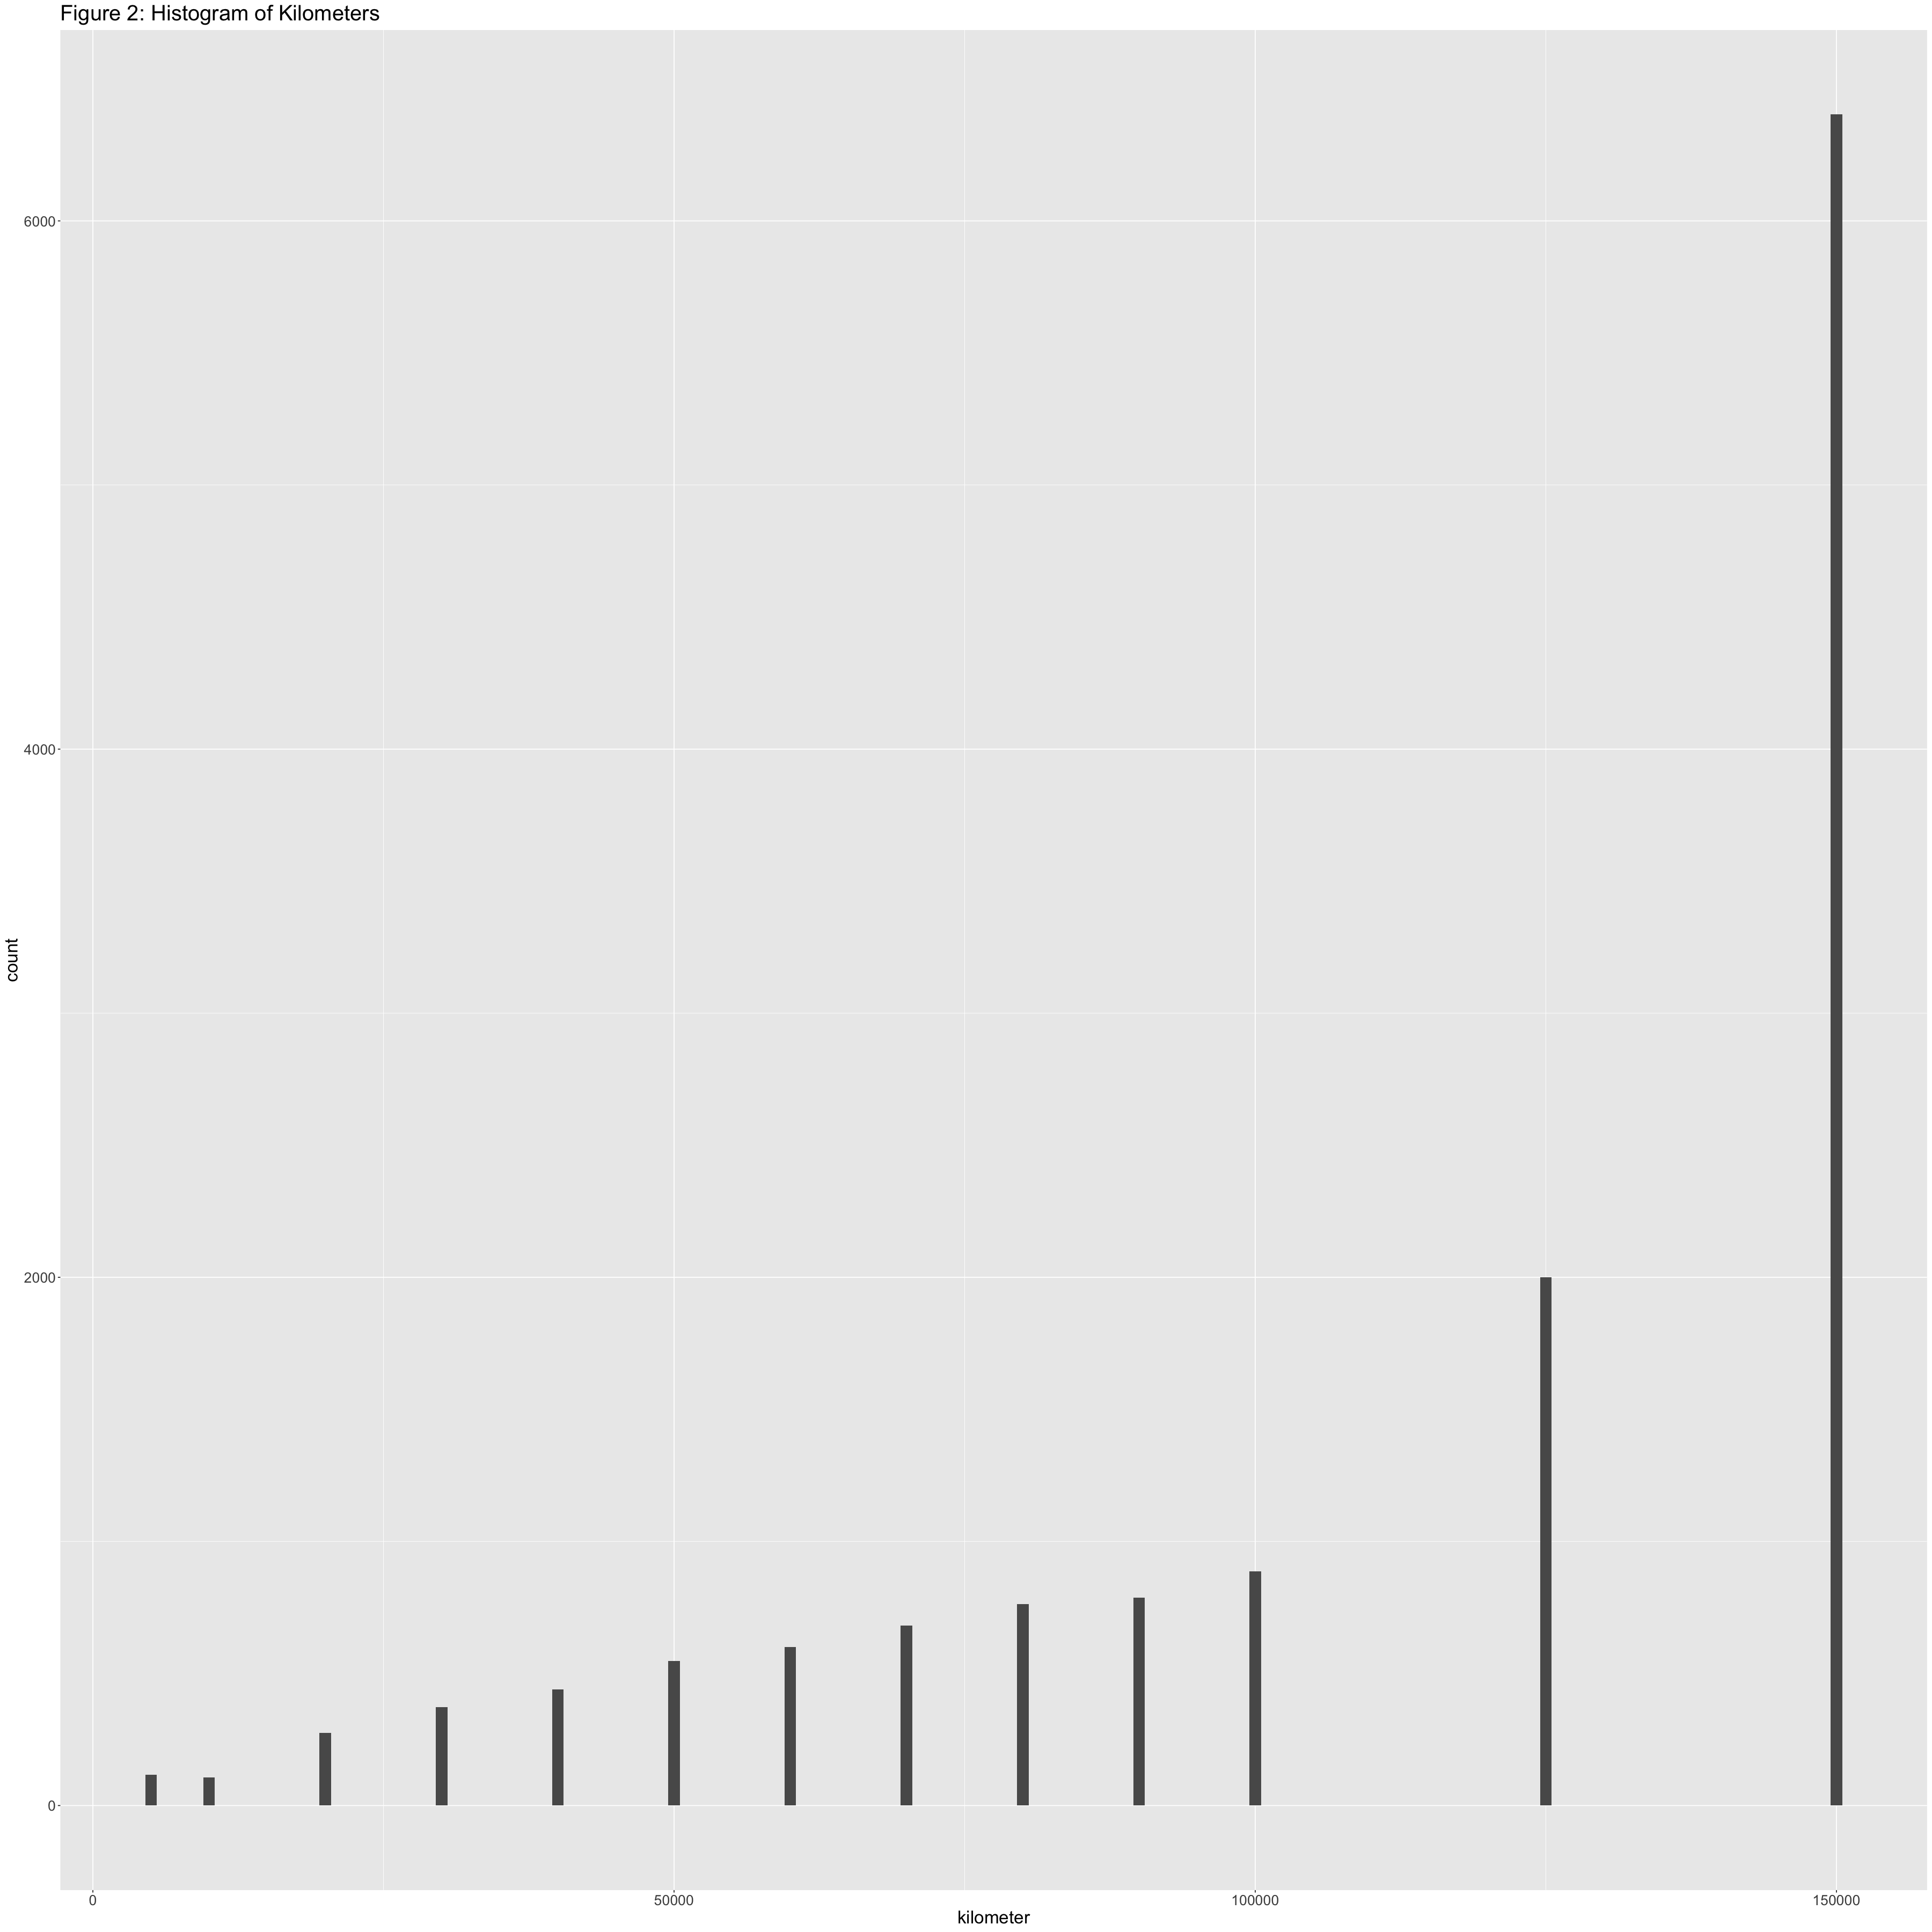

In [17]:
## Examining histograms of kilometer and price individually

kilom_hist <- car_data_num %>% ggplot(aes(x = kilometer)) +
geom_histogram(binwidth = 1000) + 
xlab("kilometer") + 
ggtitle("Figure 2: Histogram of Kilometers") +
theme(text = element_text(size = 20))

kilom_hist

It seems that the kilometer values have been rounded to "whole" values (ie. 90000, 125000). Although this serves more as a categorical variable, we will still treat it as a numeric variable. 

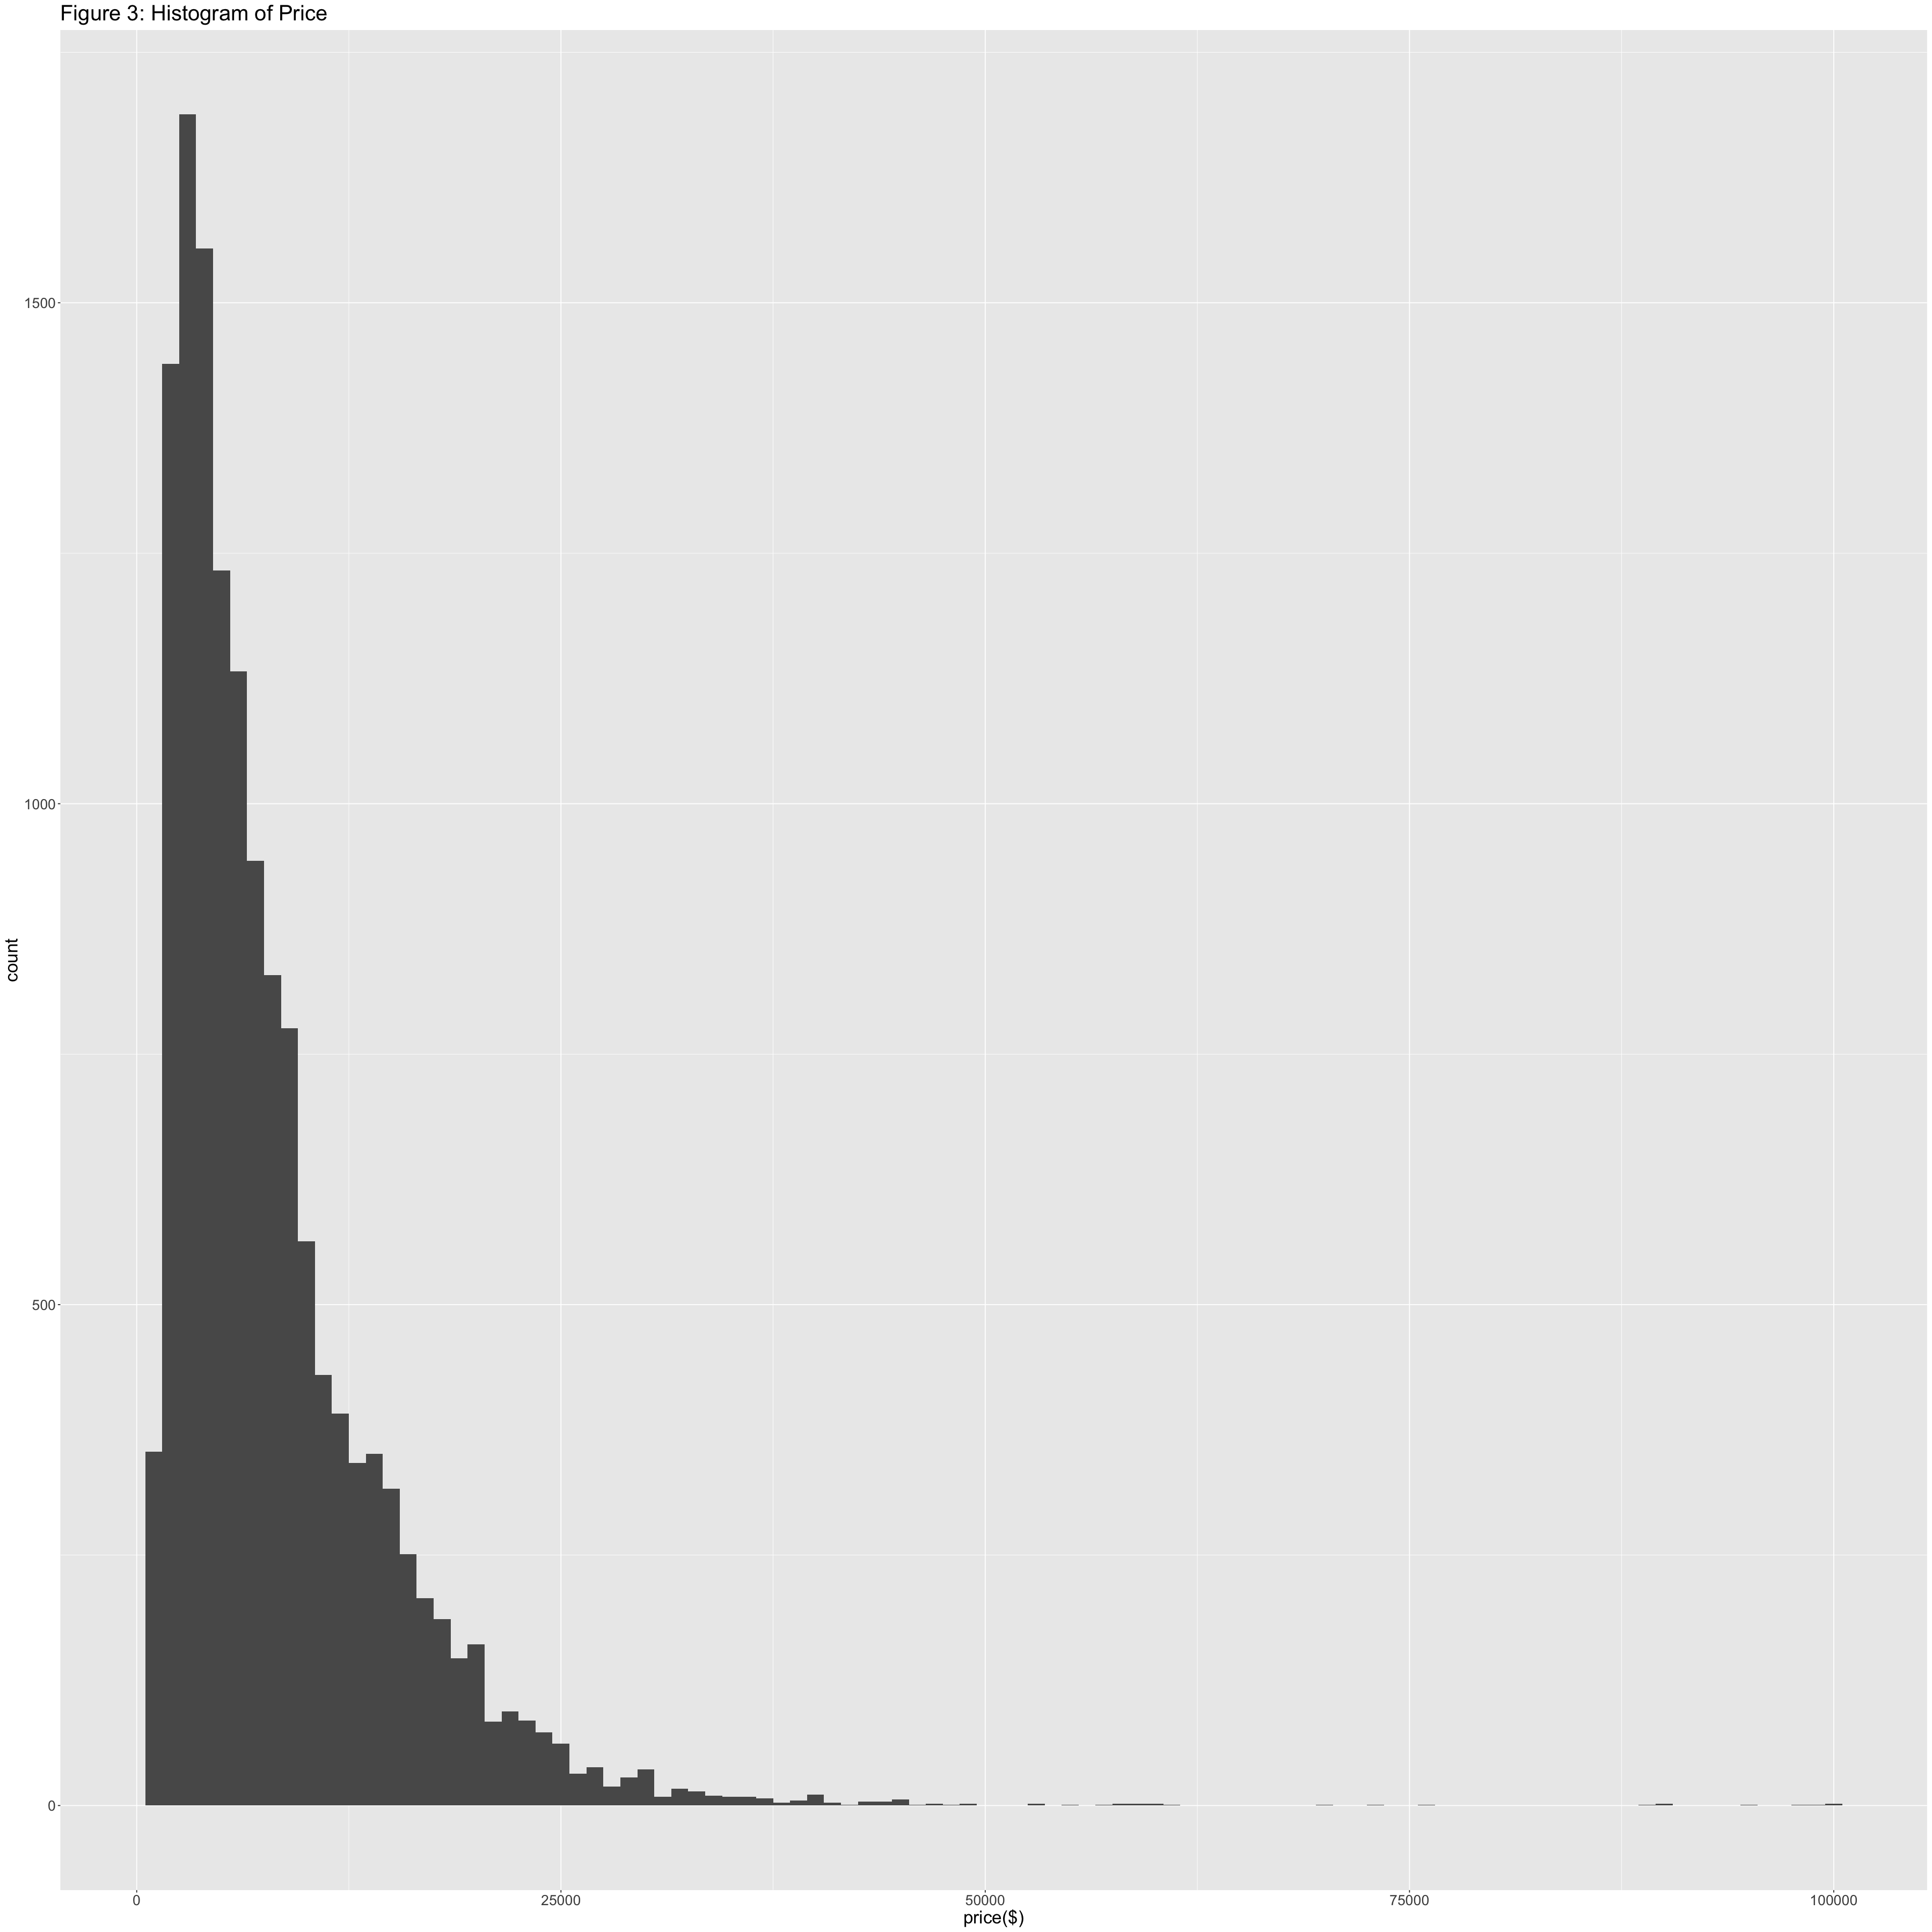

In [18]:
price_hist <- car_data_num %>% ggplot(aes(x = price)) +
geom_histogram(binwidth = 1000) + 
xlab("price($)") + 
ggtitle("Figure 3: Histogram of Price") +
theme(text = element_text(size = 20))

price_hist

Majority of vehicles appear to have a price < 20000, however the price spans up to our filtered value ($100000)

In [19]:
## selecting only categorical variables
car_data_cat <- car_data_ready %>% select(-price, -Age, -powerPS, -kilometer, -monthOfRegistration)

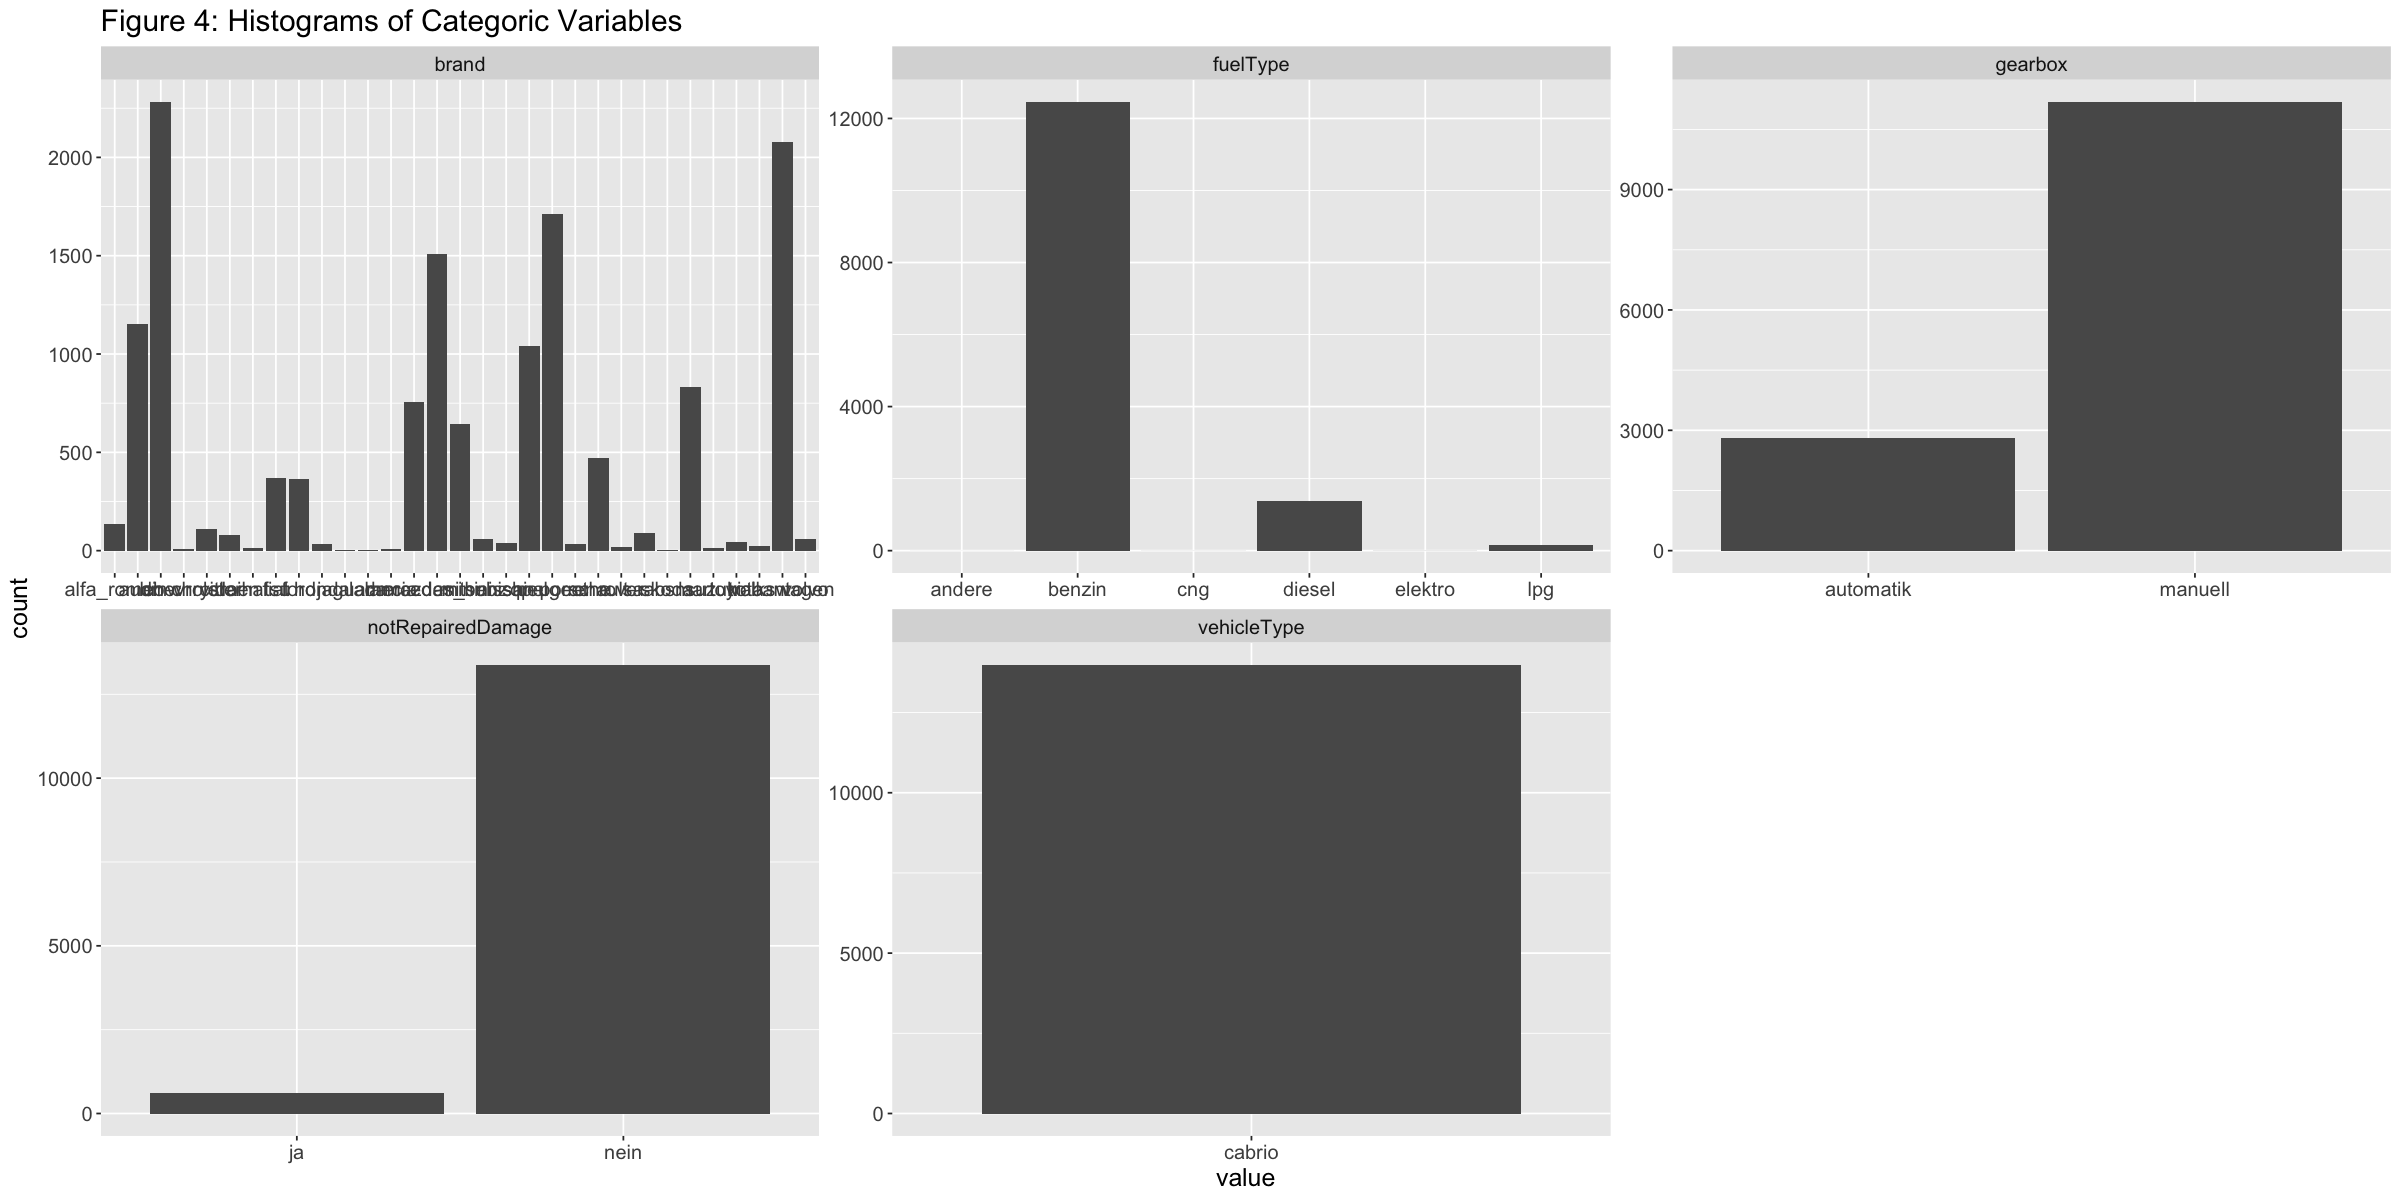

In [20]:
## Visualizing barplots for categorical variables:
options(repr.plot.width = 20, repr.plot.height = 10)
car_data_catlong <- car_data_cat %>%                          
  pivot_longer(colnames(car_data_cat)) %>% 
  as.data.frame()

cat_plot <- ggplot(car_data_catlong, aes(x = value)) +    # Draw each column as histogram
  geom_bar() + 
  facet_wrap(~ name, scales = "free") +
  ggtitle("Figure 4: Histograms of Categoric Variables") + 
  theme(text = element_text(size = 15))
cat_plot

From the barplots we can see that the brand variable has a very large amount of possible categories. This will lead to many different "dummy" variables when one-hot encoding is performed. We can also see that most vehicles in the data are manual shifting with no non-repaired damage. 

The correlations appear to have odd shapes, it seems that much of the data was rounded or split into "categories" rather than keeping the exact value. 

In [21]:
# Examining correlation values as a dataframe: 
corr_matrix_cars <- car_data_num %>%
cor() %>%
as.data.frame() %>%
rownames_to_column("variable1") %>%
pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")
corr_matrix_cars

variable1,variable2,correlation
<chr>,<chr>,<dbl>
price,price,1.00000000
price,Age,-0.22156540
price,powerPS,0.29485510
price,kilometer,-0.54189902
price,monthOfRegistration,-0.01447313
Age,price,-0.22156540
Age,Age,1.00000000
Age,powerPS,-0.18591921
Age,kilometer,0.38584950


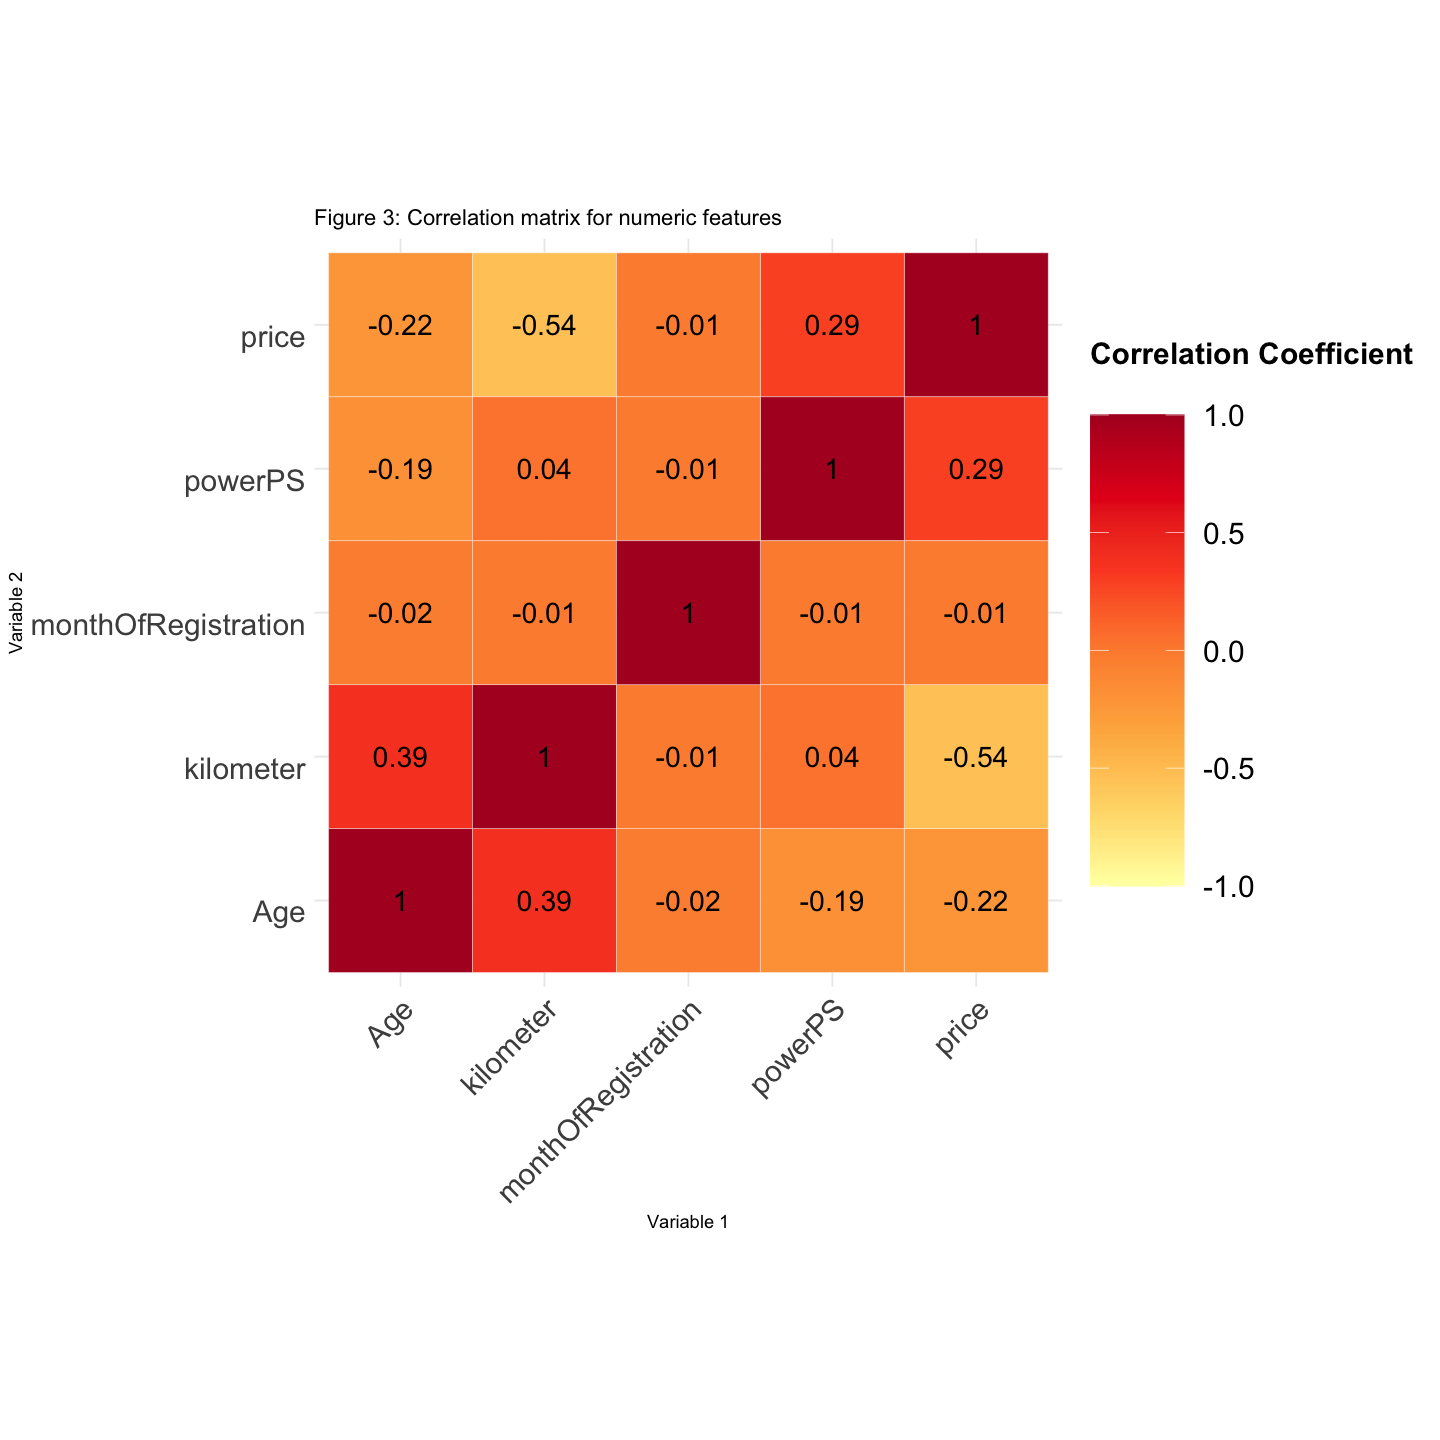

In [22]:
## Examining correlation values through heatmap
options(repr.plot.width = 12, repr.plot.height = 12)
plot_corr_matrix_car <- corr_matrix_cars %>%
  ggplot(aes(variable1, variable2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Variable 1", y = "Variable 2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(variable1, variable2, label = round(correlation, 2)), color = "black", size = 6) + 
  ggtitle("Figure 3: Correlation matrix for numeric features")
plot_corr_matrix_car

From the correlation heatmap we see that the numeric variables are all quite minimally correlated. The only correlation greater than 0.1 is the correlation between year of registration and kilometers, which is intuitive as the older a vehicle is, the more it has likely been driven. Therefore it is likely that either the large correlations lie within the categorical variables, or there are generally low correlations between all explanatory variables. 

## Data Analysis

In [23]:
## Splitting into training and testing data with 70/30 split
set.seed(124)
car_data_ready$Index <- 1:nrow(car_data_ready)
training_car <- data.frame(sample_n(car_data_ready, size = nrow(car_data_ready) * 0.7, replace = FALSE))  %>%
select(-c(vehicleType, brand, fuelType))
testing_car <- data.frame(anti_join(car_data_ready, training_car, by = "Index")) %>%
select(-c(vehicleType, brand, fuelType))
rownames(training_car) <- training_car$Index
rownames(testing_car) <- testing_car$Index
training_car <- training_car %>% select(-Index)
testing_car <- testing_car %>% select(-Index)
head(training_car)
head(testing_car)

,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
5441,3349.390,manuell,131,150000,9,nein,18
10407,1398.206,manuell,90,150000,1,nein,17
1002,5300.130,manuell,120,125000,8,nein,9
9627,16000.847,manuell,50,20000,5,nein,45
2776,3649.224,manuell,109,100000,10,nein,12
5510,2351.382,manuell,116,150000,4,nein,21


,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2299.427,manuell,109,150000,8,nein,12
4,9550.214,manuell,170,150000,12,nein,12
5,9898.842,manuell,150,60000,11,nein,10
6,6999.912,manuell,163,100000,1,nein,10
14,2395.411,automatik,54,100000,5,nein,16
19,14003.704,manuell,150,80000,4,nein,8


In this case we have removed the non-binary categorical variables from the dataset for simplicity of the model. Without these specifications the model is very inaccurate and violates the assumption of normally distributed residuals, as we have spent a long time attempting to find the right specifications of the data. We also remove index from the dataframe and designate it as a row index. 

In [24]:
## Performing forward selection to determine the input variables that provide the best model. 
forward_sel <- regsubsets(x = price ~., nvmax = 58, data = training_car, method = "forward")
forward_summary <- summary(forward_sel)
forward_summary

Subset selection object
Call: regsubsets.formula(x = price ~ ., nvmax = 58, data = training_car, 
    method = "forward")
6 Variables  (and intercept)
                      Forced in Forced out
gearboxmanuell            FALSE      FALSE
powerPS                   FALSE      FALSE
kilometer                 FALSE      FALSE
monthOfRegistration       FALSE      FALSE
notRepairedDamagenein     FALSE      FALSE
Age                       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         gearboxmanuell powerPS kilometer monthOfRegistration
1  ( 1 ) " "            " "     "*"       " "                
2  ( 1 ) " "            "*"     "*"       " "                
3  ( 1 ) "*"            "*"     "*"       " "                
4  ( 1 ) "*"            "*"     "*"       " "                
5  ( 1 ) "*"            "*"     "*"       " "                
6  ( 1 ) "*"            "*"     "*"       "*"                
         notRepairedDamagenein Age
1  ( 1 ) " "       

In [25]:
## Examining the statistics of each model to choose the best model, as we plan to predict we will choose the model with the
## lowest Cp
forward_summary_df <- tibble(
    n_input_variables = 1:6,
    RSQ = forward_summary$rsq,
    RSS = forward_summary$rss,
    ADJ.R2 = forward_summary$adjr2,
    Cp = forward_summary$cp,
    BIC = forward_summary$bic,
) %>% arrange(Cp)

head(forward_summary_df)

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.4122693,264485359765,0.4119088,7.00000,-5137.867
5,0.4118968,264652969116,0.4115962,11.19840,-5140.855
4,0.4074723,266644044368,0.4072301,82.83086,-5076.681
3,0.4026705,268804935379,0.4024873,160.74332,-5006.867
2,0.3973719,271189342168,0.3972487,246.92167,-4929.615
1,0.3008253,314636387866,0.3007539,1851.64786,-3484.304


It appears that the model with all 6 input variables will produce the most accurate predictions. We will now obtain the variables that are present in this model using forward_summary. 

Variables to use: gearbox, powerPS, kilometer, monthOfRegistration, notRepairedDamage and Age

In [26]:
## Creating linear model with selected variables and initial results 
lm_model_base <- lm(price ~ gearbox + powerPS + kilometer + notRepairedDamage + Age, data = training_car)
tidy(lm_model_base, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.689791e+03,3.541412e+02,27.361377,6.833434e-159,8.995601e+03,1.038398e+04
gearboxmanuell,-1.296294e+03,1.322768e+02,-9.799856,1.431915e-22,-1.555584e+03,-1.037004e+03
powerPS,5.191774e+01,1.302096e+00,39.872450,2.766768e-322,4.936536e+01,5.447011e+01
kilometer,-9.111837e-02,1.343586e-03,-67.817274,0.000000e+00,-9.375208e-02,-8.848467e-02
notRepairedDamagenein,2.380179e+03,2.582349e+02,9.217109,3.682339e-20,1.873985e+03,2.886373e+03
Age,6.623670e+01,7.721104e+00,8.578657,1.105724e-17,5.110174e+01,8.137166e+01


In [27]:
train_preds <- predict(lm_model_base, training_car)
length(train_preds[train_preds < 0])

[1] 158

Above we notice that there are many negative predictions with this model. Since price is a positive variable, we will counter this by taking the log of price in the model to ensure all predictions are positive. 

In [28]:
## Creating model with log(price) as response
lm_model <- lm(log(price) ~ gearbox + powerPS + kilometer + notRepairedDamage + Age, data = training_car)
tidy(lm_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.669102e+00,3.601179e-02,240.729533,0.000000e+00,8.598512e+00,8.739693e+00
gearboxmanuell,-1.247518e-01,1.345092e-02,-9.274592,2.161182e-20,-1.511184e-01,-9.838524e-02
powerPS,6.545944e-03,1.324071e-04,49.438029,0.000000e+00,6.286399e-03,6.805489e-03
kilometer,-9.616713e-06,1.366262e-07,-70.387048,0.000000e+00,-9.884529e-06,-9.348898e-06
notRepairedDamagenein,5.008310e-01,2.625930e-02,19.072516,1.179923e-79,4.493573e-01,5.523046e-01
Age,-5.068872e-03,7.851411e-04,-6.456002,1.126083e-10,-6.607911e-03,-3.529834e-03


From the p-values given in the tidy table we can see that all of the explanatory variables are significant and should be included in the model. 


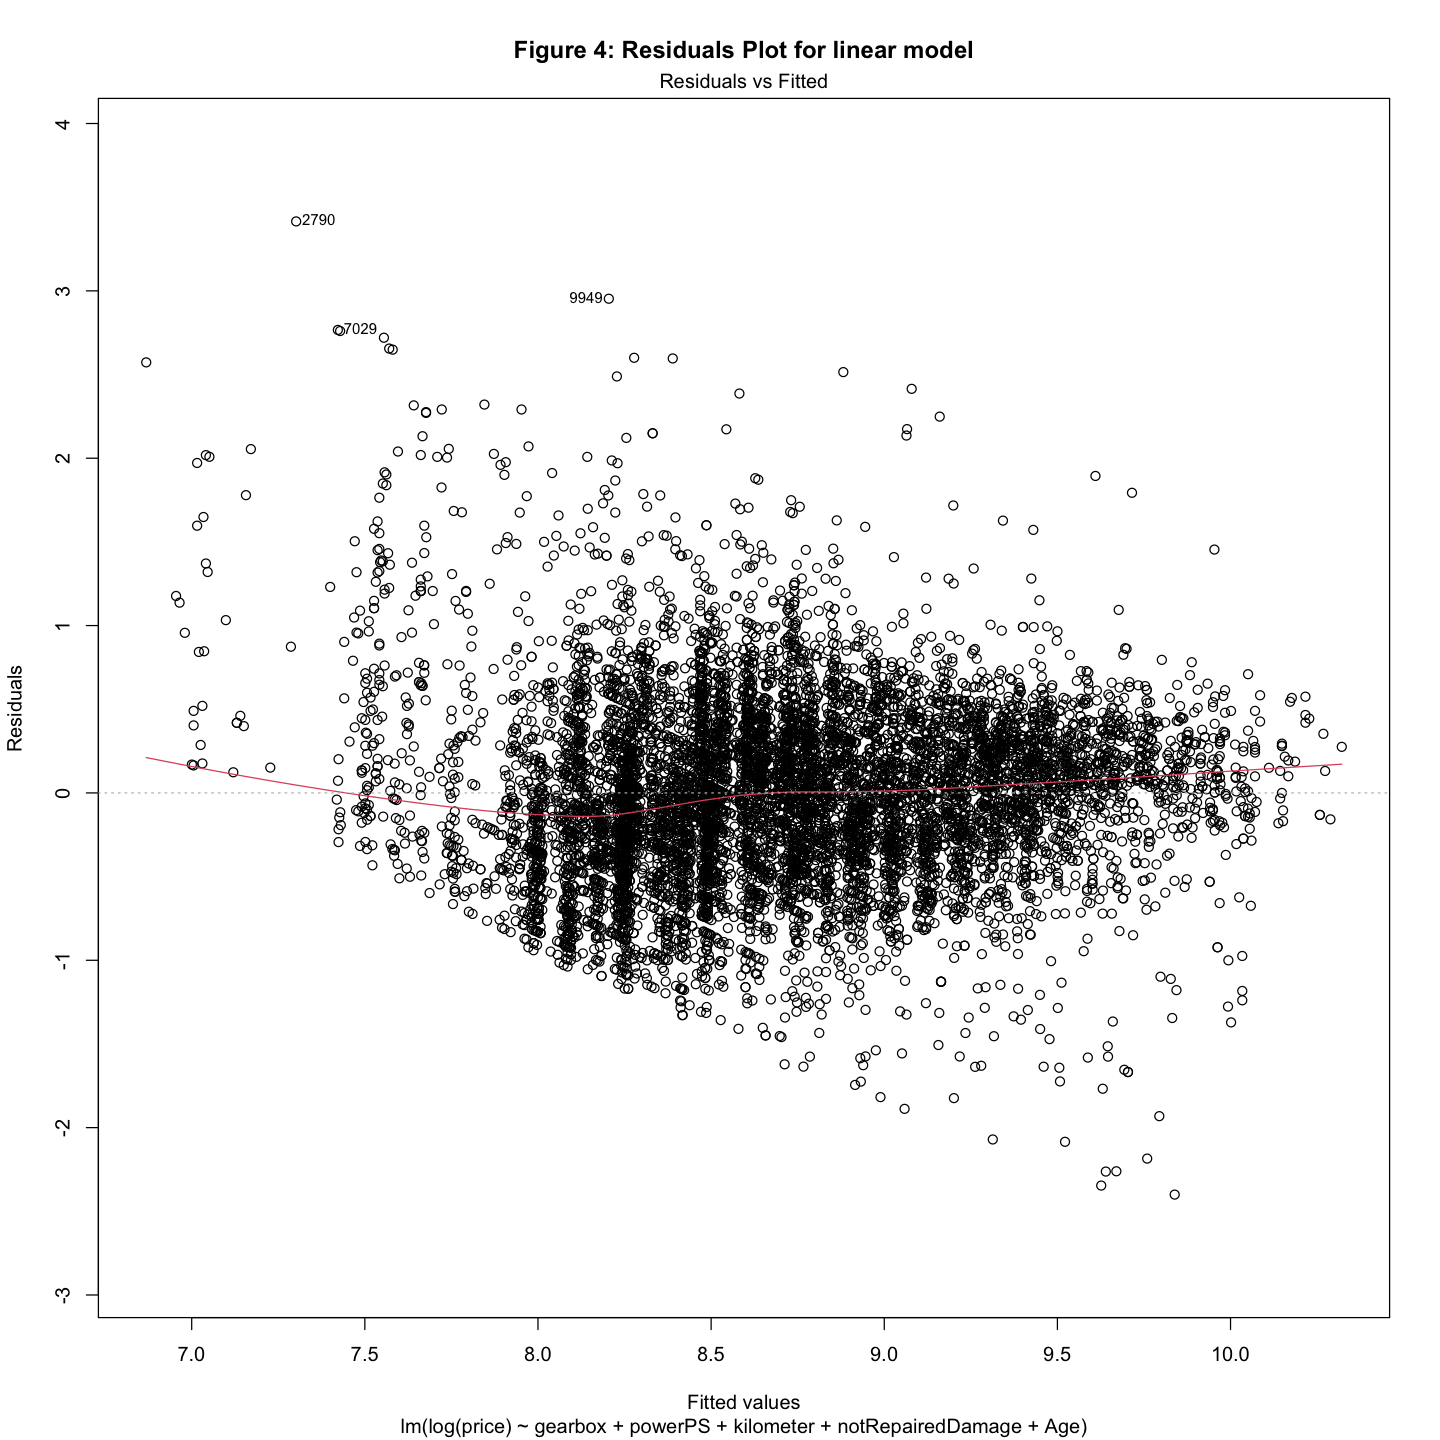

In [29]:
## Examining model for heteroscedacisity by looking at residual plots
plot(lm_model, 1, main = "Figure 4: Residuals Plot for linear model")


The residuals seem to be approximately randomly distributed about zero, with the points with lower fitted values being slightly under-predicted. This plot also implies homoscedasticity within our filtered dataset. 

Once again there are outliers in the data, even with the most extreme outliers removed. These outliers will remain in the data as the model needs to take into account some of the extreme cases of the data. It does appear that the residuals are approximately evenly spread in terms of variance, indicating the presence of homoscedasticity. 

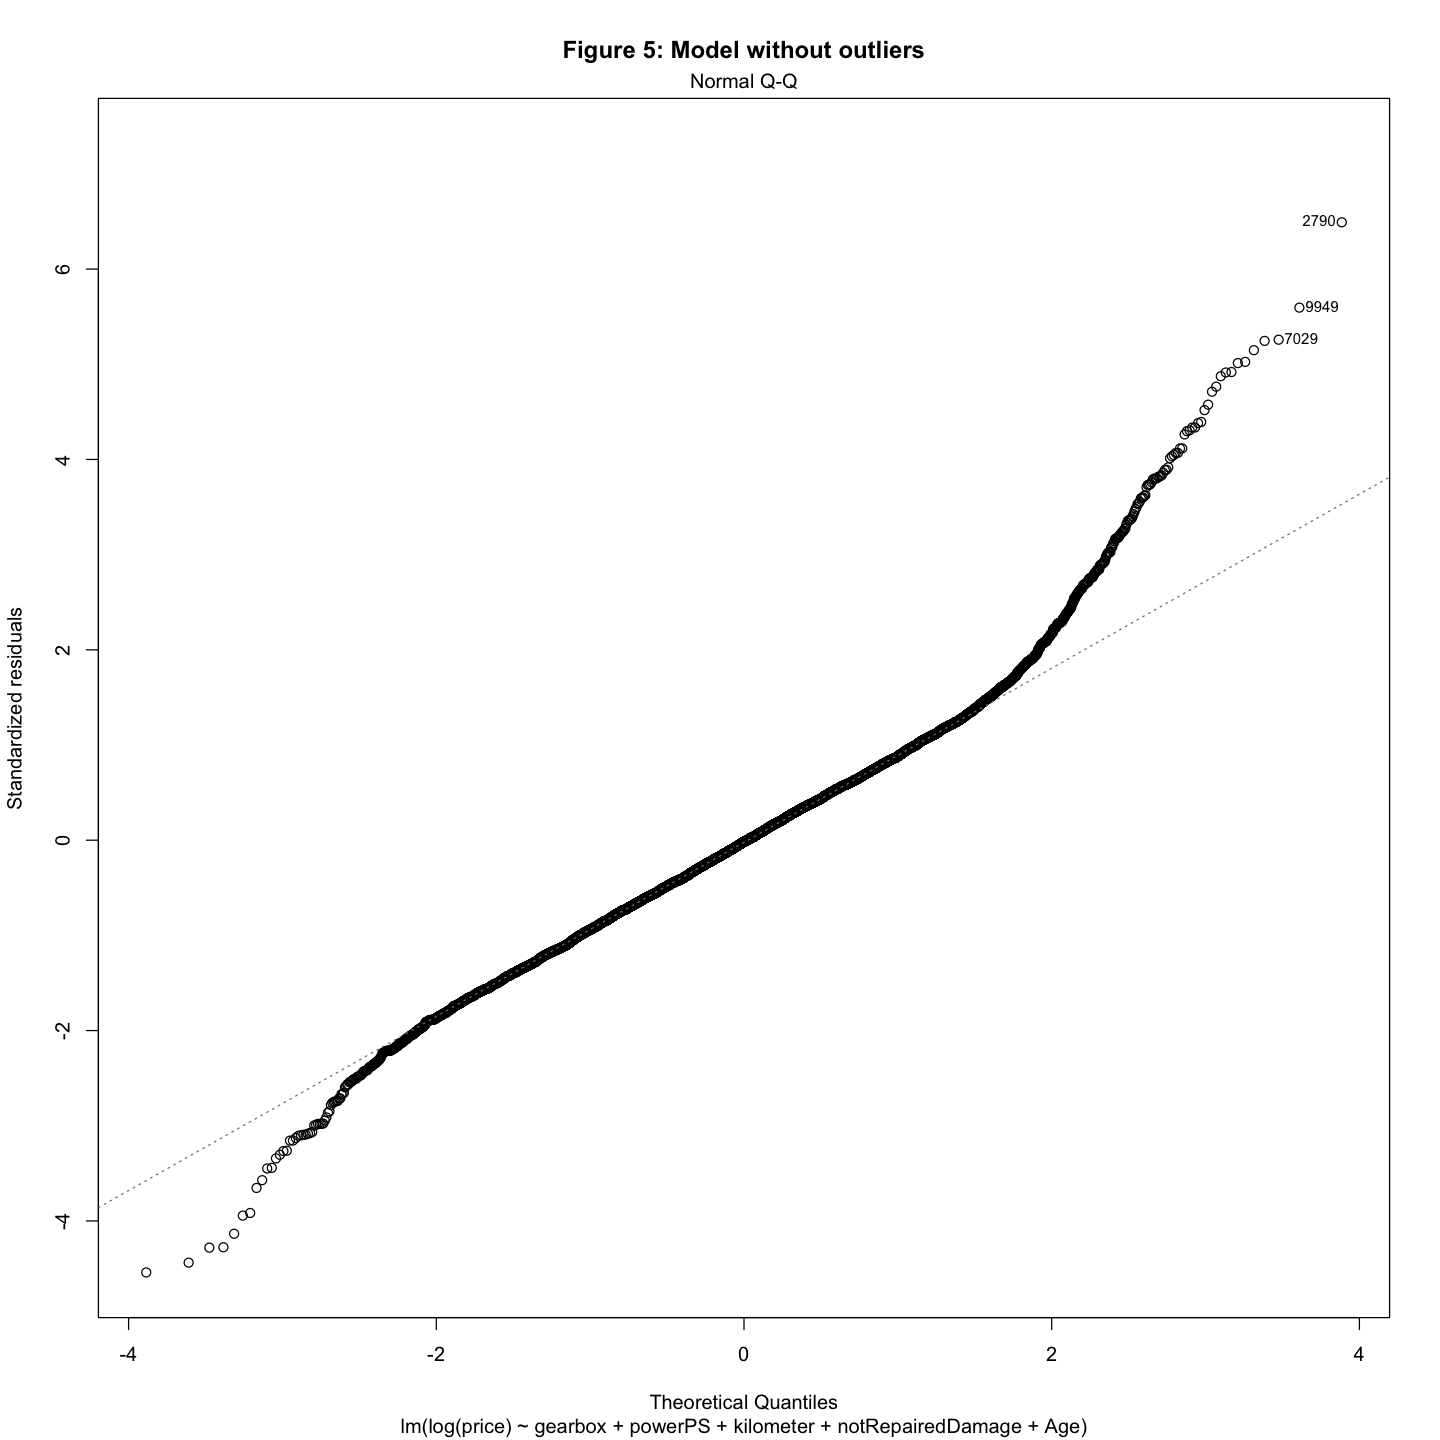

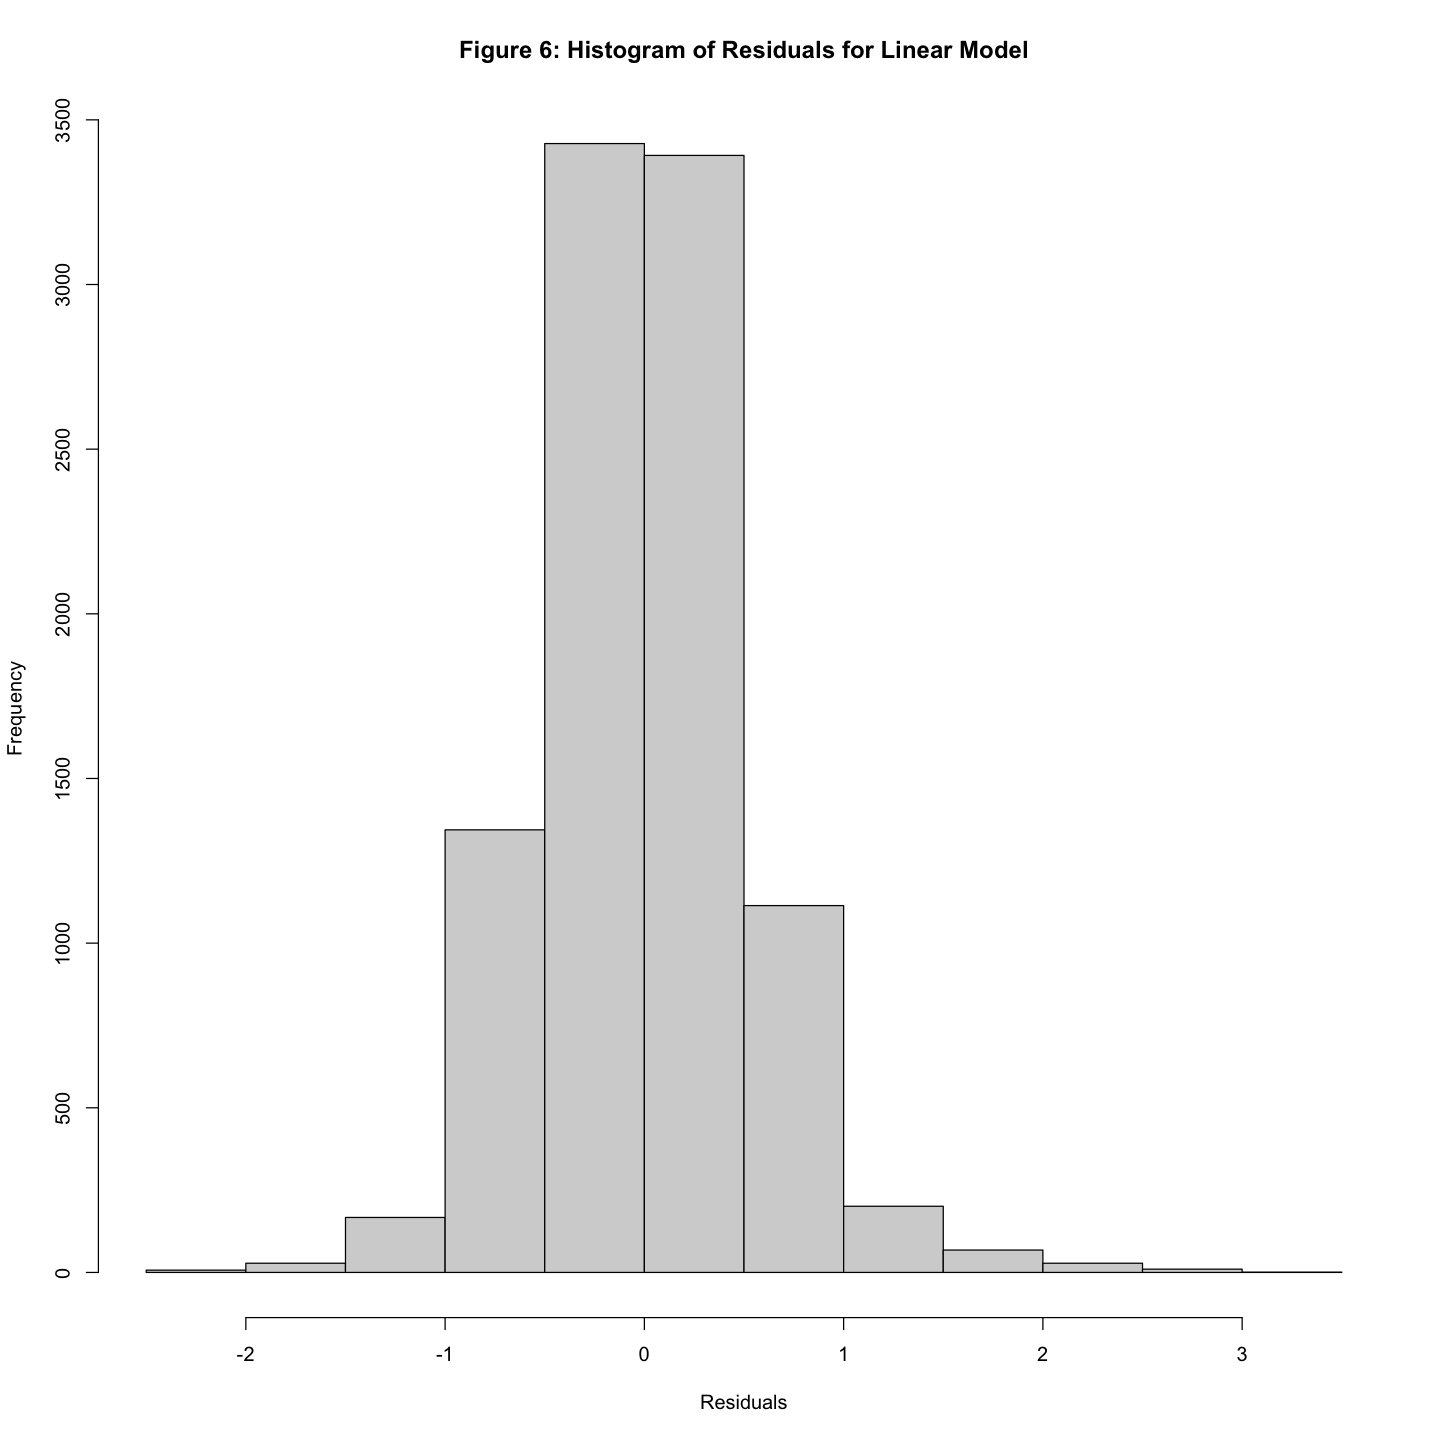

In [30]:
## Analyzing QQ plot and histogram of resiudals to ensure normality assumption is valid. 
plot(lm_model, 2, main = "Figure 5: Model without outliers")
hist(residuals(object = lm_model),
  breaks = 10,
  main = "Figure 6: Histogram of Residuals for Linear Model",
  xlab = "Residuals"
)

From the above plots we can see that the residuals are not exactly normally distributed. However this appears to be due to the presence of outliers in the data that have very large residual values, as the "middle" section of the qq-plot is a straight line along the 45 degree line, illustrating normality. It is just at the tails of the qq-plot where normality may not necessarily be present. The histogram of residuals appears to be approximately normal, with slightly longer tails. This once again references the outliers in the data. 

In [31]:
## Predicting on the data with 95% confidence intervals for each prediction
preds <- predict(lm_model, testing_car, interval = "prediction", level = 0.95)
testing_with_preds <- cbind(testing_car, preds) %>% mutate(logprice = log(price)) %>% mutate(efit = exp(fit))
head(testing_with_preds)


,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age,fit,lwr,upr,logprice,efit
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2299.427,manuell,109,150000,8,nein,12,8.255356,7.218412,9.292300,7.740415,3848.181
4,9550.214,manuell,170,150000,12,nein,12,8.654658,7.617684,9.691633,9.164319,5736.809
5,9898.842,manuell,150,60000,11,nein,10,9.399382,8.362406,10.436357,9.200173,12080.907
6,6999.912,manuell,163,100000,1,nein,10,9.099810,8.062888,10.136733,8.853653,8953.594
14,2395.411,automatik,54,100000,5,nein,16,8.480641,7.443397,9.517885,7.781310,4820.539
19,14003.704,manuell,150,80000,4,nein,8,9.217185,8.180254,10.254116,9.547077,10068.681


From the first 6 points in our dataset we can see that the predictions are not very accurate for the model, however the prediction intervals are quite wide and do contain the predicted values. This will be explored further through metrics such as R^2 score. 

In [32]:
## Calculating mean squared prediction error (MSPE): 
MSPE <- mean((log(testing_car$price) - predict(lm_model, testing_car))^2)
MSPE

[1] 0.2882969

From the MSPE we can see that each prediction has an average squared error of 0.268. However since we are working in terms of log(price), this is not a very interpretable value, as this represents that the MSPE is 0.268 log($)^2. To produce an interpretable metric we will produce the RMSE of the original price and exp of the predictions.


In [33]:
MSPE_scaled <- sqrt(mean((testing_car$price - exp(predict(lm_model, testing_car)))^2))
MSPE_scaled

[1] 5117.186

This metric reveals that the average prediction is off by ~$5000, which is not very good. However this is the best results we can obtain from this dataset, as there are many outliers or data points entered incorrectly that skew the predictions. 

# Discussion
### Summarize what you found, and the implications/impact of your findings.
The model we predicted gives us a clear view of how the car price is calculated. We found the type of gearbox (manual or not) and if the car was repaired or not affected the car price most, and the MSPE is around 4967.62. Our report provides opportunities for us to predict the car price with given variables. It can help people who have no idea about the used car price when purchasing. In secondhand car markets, there are many cars with diverse types of configurations, it must be confusing for people to choose their ideal car without an estimation. Our model can help them build up a standard of car prices with the given information, it is a better way to help them get rid of fraud prices. It also works for sellers who have no clue to set a suitable price when their cars are on sale. It could provide a fair and transparent price guide to people who intend to purchase and sell pre-owned cars.
If relevant, discuss whether your results were what you expected to find.
Overall, the results are not what we expected, even though we aimed to provide an estimated car price, the accuracy could be better with a larger data set with more useful information.
### Discuss how your model could be improved.
 Although we use a regsubsets function help us to figure out the suitable variables used, there are many problems with the original data set, we scaled and get rid of some outliers and unnormal data, but the correlations between variables seemed not improved a lot, it could better fit with a more suitable data set. For the fitting and predicting, we split the train and test set. It works well to prevent overfitting the original data and got one reasonable model, but it could be better to predict the model with more methods and compare which one is better if we got more time and resources working on it. There is also much categorical data we must discard so that it is easier for us to use the things we learn from STAT 301. So, it would be great if others could find an algorithm to use all the related information. We tried to scale some of the data based on our judgment, some of them work well but some do not. A better and wisdom scaling method is needed to improve the model.
### Discuss future questions/research this study could lead to
Our topic leads to many diverse questions, from the model we can get to know how different variables affect pre-owned car prices, and the car company can do more research on why the car price is deeply affected by some of the factors, and how to make car maintenance of value. We build up the model because of the expansion of demand for second-hand cars, but why has this trend become popular, is there any connection between social events or the changes in people’s aspect? How different sorts of demand for second-hand cars can save resources? The diverse questions include research areas from car markets to a sustainable society. Many fields could be researched deeper, and we hope our topic could bring some sort of idea about the related topics.

## References:

1. A Quantitative Analysis of the Used-Car Market
Gavazza, Alessandro; Lizzeri, Alessandro; Roketskiy, Nikita
The American Economic Review; Nashville Vol. 104, Iss. 11,  (Nov 2014): 3668-3700. DOI:10.1257/aer.104.11.3668
https://www.proquest.com/docview/1616544603?accountid=14656&pq-origsite=summon

2. Car Price Prediction using Machine Learning Techniques
Enis Gegic, Becir Isakovic, Dino Keco, Zerina Masetic, Jasmin Kevric
DOI: https://doi.org/10.18421/TEM81-16
https://doaj.org/article/b2eabc7cfbae4de284f0ac631260ca52

3. https://data.world/data-society/used-cars-data